In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
import pandas as pd
import string
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

pd.set_option('display.max_colwidth', 400)
df=pd.read_csv("ready_corona_tweets_january1_january2.csv")
df.drop(['hashtags','user_location','user_description','media','urls','user_followers_count','user_created_at','user_default_profile_image','id','user_statuses_count','source','favorite_count','in_reply_to_user_id','retweet_count','coordinates','user_favourites_count','created_at','in_reply_to_screen_name','in_reply_to_status_id','possibly_sensitive','retweet_screen_name','tweet_url','user_friends_count','user_listed_count','user_name','user_time_zone','user_verified','user_screen_name.1','user_urls'],axis=1,inplace=True)
df["text"] = df["text"].str.lower()
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df.reset_index()
df.head()

,lang,place,retweet_id,text,user_screen_name
0,en,"Corona, CA",NaN,"good night and hello #2021 #nye #newyearseve #newyear #2020 #2021 #happynewyear #happynewyear2021 #happynewyou @ corona, california https://t.co/r5sdgfg6ea",CarloandSeb
1,en,"Huntington Beach, CA",NaN,"low key, covid friendly, new years eve with @julia.guliaa_ 2021 is bound to be better than this year. its easier to get through trying times with great friends https://t.co/xwx3q9hmtk",MsPhoebeJane
2,en,"London, England",NaN,people throng streets in #chinas covid-hit #wuhan to celebrate #newyear https://t.co/iw5ocwq1dg,BritishHeraldUK
3,en,"East, England",NaN,covid rules leaving visually impaired people totally disorientated - bbc news https://t.co/c5961h9c2s,Harlow_News
4,en,"Manhattan, NY",NaN,"happy new year everyone. hers to a better 2021. be safe and take care of yourselves. #wearamask #6feetapart #nye #nye2021 #bye2020 #hello2021 #2021 @ new york, new york https://t.co/4ybyne4ufn",sonnysofrito


In [31]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9]+', '', text)  #removed @mentions
    text = re.sub('#', '', text) #removing the hash symbols
    text = re.sub('RT', '', text) #removing RT
    text = re.sub('https?:\/\/\S+', '', text) #remove the hyper links
    return text
df['text'] = df['text'].apply(cleanTweets)

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def remove_pun(text):
    txt_nopunt ="".join([c for c in text if c not in string.punctuation])
    return txt_nopunt
df['text'] = df['text'].apply(remove_pun)

In [44]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["place"], inplace=True)
df = df[df['retweet_id'].isnull()]
df.drop(df.index[(df["lang"] != "en")], axis = 0, inplace = True)
df = df.replace(r'\n\n',' ', regex=True) 
df = df.replace(r'\n',' ', regex=True) 

In [45]:
rows = df.shape[0] 
print("Rows: " + str(rows)) 

Rows: 568


In [46]:
df['text'] = df['text'].astype('str') 
df['polarity'] = df.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
df = df.reset_index()
df.head()

,level_0,index,lang,place,retweet_id,text,user_screen_name,polarity,subjectivity,Analysis
0,0,0,en,"Corona, CA",NaN,good night and hello 2021 nye newyearseve newyear 2020 2021 happynewyear happynewyear2021 happynewyou corona california,CarloandSeb,0.700000,0.600000,Positive
1,1,1,en,"Huntington Beach, CA",NaN,low key covid friendly new years eve with guliaa 2021 is bound to be better than this year its easier to get through trying times with great friends,MsPhoebeJane,0.301894,0.584091,Positive
2,2,2,en,"London, England",NaN,people throng streets in chinas covidhit wuhan to celebrate newyear,BritishHeraldUK,0.000000,0.000000,Neutral
3,3,3,en,"East, England",NaN,covid rules leaving visually impaired people totally disorientated bbc news,Harlow_News,0.000000,0.375000,Neutral
4,4,4,en,"Manhattan, NY",NaN,happy new year everyone hers to a better 2021 be safe and take care of yourselves wearamask 6feetapart nye nye2021 bye2020 hello2021 2021 new york new york,sonnysofrito,0.368182,0.560606,Positive


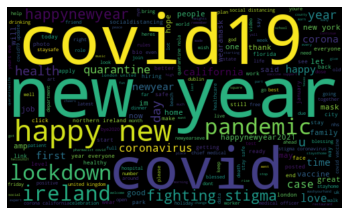

In [47]:
#plot the word cloud
all_words = ' '.join( twts for twts in df['text'] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120).generate(all_words)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [48]:
#create a function to compute negative, neutral and positive analysis
def get_analysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['polarity'].apply(get_analysis)
df.head()

,level_0,index,lang,place,retweet_id,text,user_screen_name,polarity,subjectivity,Analysis
0,0,0,en,"Corona, CA",NaN,good night and hello 2021 nye newyearseve newyear 2020 2021 happynewyear happynewyear2021 happynewyou corona california,CarloandSeb,0.700000,0.600000,Positive
1,1,1,en,"Huntington Beach, CA",NaN,low key covid friendly new years eve with guliaa 2021 is bound to be better than this year its easier to get through trying times with great friends,MsPhoebeJane,0.301894,0.584091,Positive
2,2,2,en,"London, England",NaN,people throng streets in chinas covidhit wuhan to celebrate newyear,BritishHeraldUK,0.000000,0.000000,Neutral
3,3,3,en,"East, England",NaN,covid rules leaving visually impaired people totally disorientated bbc news,Harlow_News,0.000000,0.375000,Neutral
4,4,4,en,"Manhattan, NY",NaN,happy new year everyone hers to a better 2021 be safe and take care of yourselves wearamask 6feetapart nye nye2021 bye2020 hello2021 2021 new york new york,sonnysofrito,0.368182,0.560606,Positive


In [49]:
#print all the positive tweets
j = 1
sorted_DF = df.sort_values(by = ['polarity'])
for i in range (0, sorted_DF.shape[0]):
        print(str(j) + ')' + sorted_DF['text'][i])
        print()
        j = j + 1

1)good night and hello 2021 nye newyearseve newyear 2020 2021 happynewyear happynewyear2021 happynewyou  corona california 

2)low key covid friendly new years eve with guliaa 2021 is bound to be better than this year its easier to get through trying times with great friends 

3)people throng streets in chinas covidhit wuhan to celebrate newyear 

4)covid rules leaving visually impaired people totally disorientated  bbc news 

5)happy new year everyone hers to a better 2021 be safe and take care of yourselves wearamask 6feetapart nye nye2021 bye2020 hello2021 2021  new york new york 

6)gladly ringing out 2020  in where else but corona park  flushing meadows  corona park 

7)happy new year  thank you to our great customers  friends and family for a great 2020 except all the covid crap  united states 

8)2020 i looked covid 19 in the eyes and told it i aint no killer but dont push me so its only right i bring in 2021 killing shit redbottomstones happy new years  houston texas 

9)repost

In [50]:
#print all the negative tweets
j = 1
sorted_DF = df.sort_values(by = ['polarity'], ascending = 'False')
for i in range (0, sorted_DF.shape[0]):
    if(sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['text'][i])
        print()
        j = j + 1

1)a somber newyearseve party but still the happiest newyear2021 covid no more lockdown melbourne victoria australia  melbourne victoria australia 

2)survived a year of pandemic with that guy  what could possibly get worse in 2021 ready for it   maryland heights missouri 

3)happy new year praying for the lord to bring an end to this terrible pandemic i do know that he is still in control and in him there is hope god bless  chapin south carolina 

4)quarantine out now everywhere link in bio   click on the green cover art  indian trail north carolina 

5)survived a year of pandemic with that guy  what could possibly get worse in 2021 ready for it   maryland heights missouri 

6) swiss nursing home resident reportedly dies after covid19 vaccine  the jerusalem post  swiss nursing home resident reportedly dies after getting covid19 vaccine  new york post  highly unlikely vaccinated 91yearolds death due to jab swiss 

7)we want to thank everyone who has supported us since we open on decembe

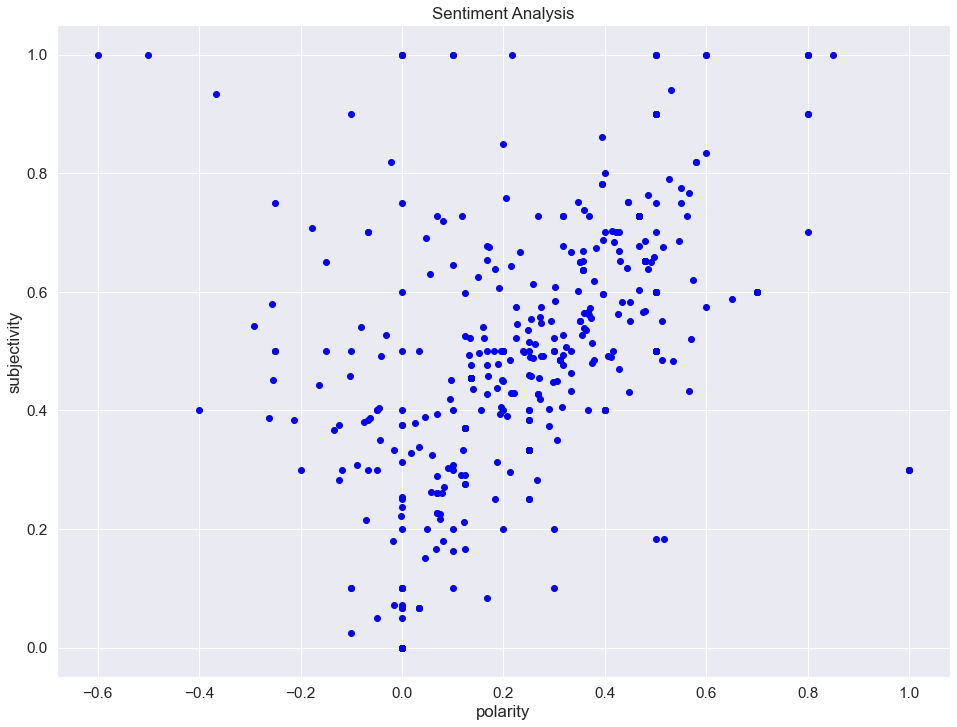

In [51]:
#plot polarity and subjectivity
plt.figure(figsize=(16, 12))
for i in range(0, df.shape[0]):
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [52]:
df['Analysis'].value_counts()


Positive    369
Neutral     150
Negative     49
Name: Analysis, dtype: int64

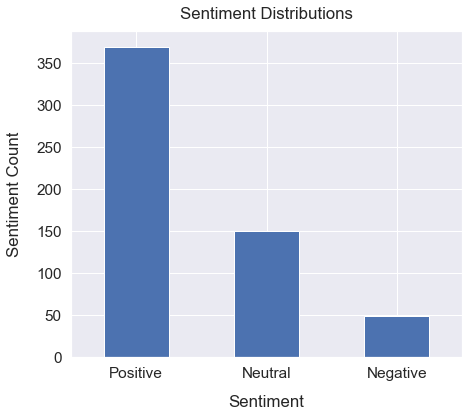

In [53]:
import seaborn as sns
sns.set(font_scale=1.4)
df['Analysis'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("Sentiment Count", labelpad=14)
plt.title("Sentiment Distributions", y=1.02);